# **INTRODUCTION:-**

Welcome!

This Project is all about advertising through different methods.

The data source file is advertising.csv dataset that conatins 4 columns(TV, Radio, Newspaper, Sales).

The goal of this project is to use the provided dataset to forecast sales by analyzing how much is spent on advertising across various platforms like TV, Radio, and Newspaper. The dataset includes information on advertising expenses on these platforms along with the corresponding sales amounts. The aim is to understand how changes in advertising spending influence sales outcomes.

In [83]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,classification_report

In [71]:
#Step 2: Loading data

df=pd.read_csv("advertising.csv")


In [70]:
#Step 3: Checking data is loaded properly or not

print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [72]:
#Step 4: Data Understanding

df.dtypes  #returns column datatypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [73]:
df.shape #returns no. of rows & columns

(200, 4)

In [74]:
df.info()  #returns data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [75]:
df.describe()  #returns statistical information

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Max sales is **27** while Min sales is **1.6**

### Mean of Tv is Highest i.e **147.04** while Radio is Lowest i.e **23.26**

In [76]:
#Step 5: Data Cleaning

df.isnull().sum() #returns no. of null values



TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [78]:
df.dropna()   #removes null values and return table

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# **Visualization of Dataset :-**

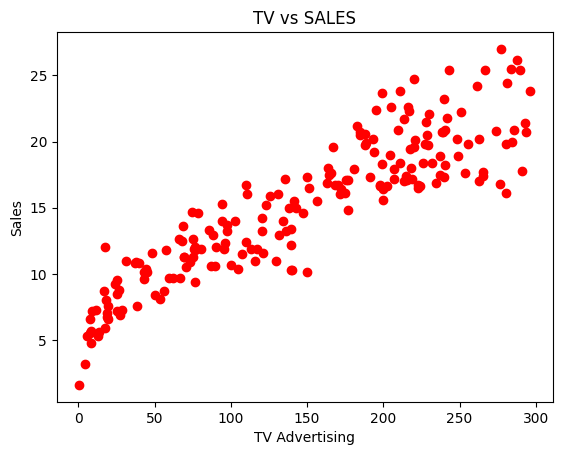

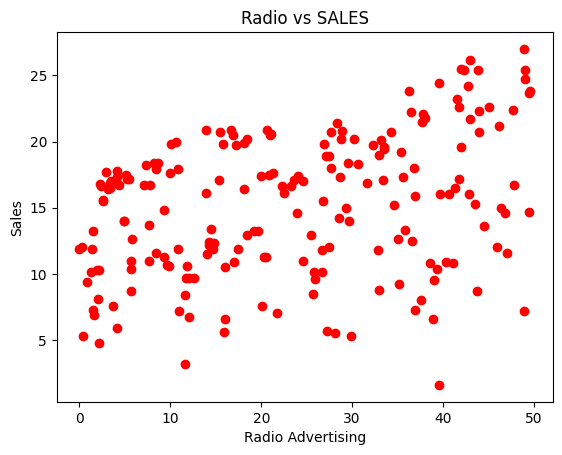

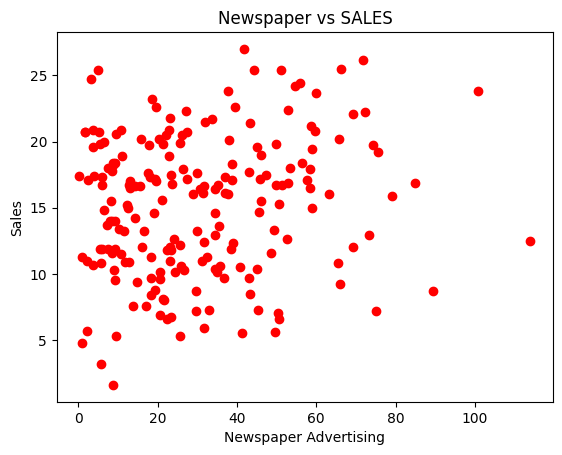

In [102]:
#Step 6: Visualization using graphs

#scatter graph

plt.scatter(np.array(df['TV']),np.array(df['Sales']),color="red")
plt.title("TV vs SALES")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.show()
print("\n\n")
plt.scatter(np.array(df['Radio']),np.array(df['Sales']),color="red")
plt.title("Radio vs SALES")
plt.xlabel("Radio Advertising")
plt.ylabel("Sales")
plt.show()
print("\n\n")
plt.scatter(np.array(df['Newspaper']),np.array(df['Sales']),color="red")
plt.title("Newspaper vs SALES")
plt.xlabel("Newspaper Advertising")
plt.ylabel("Sales")
plt.show()

According, to given scatter graphs

TV vs Sales ----> High degree +ve correlation

 Radio vs Sales ----> No Correlation

Newspaper vs Sales ----> No Correlation

### It is clearly observed that when TV advertising increases , sales also increases

### But for Radio and Newspaper it is difficult to understand and conclude

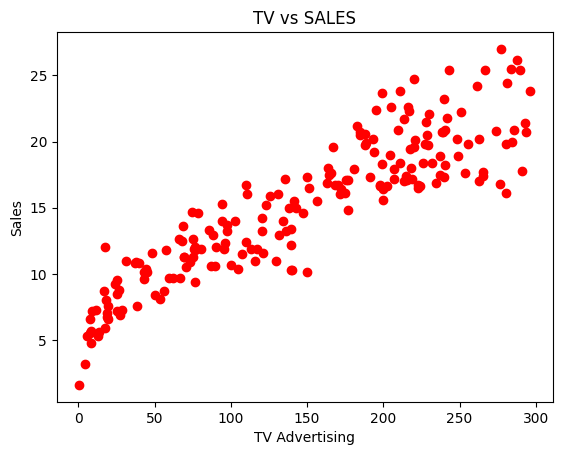

In [103]:
#studying correct scatter graph

plt.scatter(np.array(df['TV']),np.array(df['Sales']),color="red")
plt.title("TV vs SALES")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.show()

### The scatter graph illustrates the relationship between TV advertising expenditures and sales in our advertising dataset. Each point on the graph represents a data entry, plotting TV spending on the x-axis against sales on the y-axis.

# **MACHINE LEARNING ALGORITHM USED IS LINEAR REGRESSION**

In [36]:
#Step 7: Split the dataset into training and testing set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)


Here, **70%** dataset used Training &   **30%** dataset used for Testing

In [80]:
print(x_train)

[[184.9]
 [218.4]
 [284.3]
 [273.7]
 [218.5]
 [214.7]
 [227.2]
 [287.6]
 [151.5]
 [210.7]
 [  8.7]
 [ 97.5]
 [237.4]
 [230.1]
 [171.3]
 [ 13.1]
 [240.1]
 [109.8]
 [165.6]
 [222.4]
 [102.7]
 [193.7]
 [289.7]
 [261.3]
 [120.5]
 [206.9]
 [ 17.9]
 [205. ]
 [  8.6]
 [ 53.5]
 [ 36.9]
 [ 18.8]
 [107.4]
 [ 95.7]
 [232.1]
 [ 94.2]
 [ 97.2]
 [ 76.4]
 [170.2]
 [156.6]
 [139.3]
 [241.7]
 [276.7]
 [163.5]
 [255.4]
 [216.4]
 [ 59.6]
 [217.7]
 [224. ]
 [ 75.3]
 [204.1]
 [123.1]
 [ 43.1]
 [ 89.7]
 [164.5]
 [229.5]
 [175.7]
 [129.4]
 [131.1]
 [262.7]
 [216.8]
 [ 87.2]
 [187.9]
 [290.7]
 [213.5]
 [248.8]
 [ 11.7]
 [199.1]
 [ 38. ]
 [265.2]
 [ 67.8]
 [  8.4]
 [134.3]
 [ 69.2]
 [110.7]
 [139.5]
 [100.4]
 [239.8]
 [293.6]
 [  0.7]
 [265.6]
 [140.3]
 [  7.8]
 [225.8]
 [ 88.3]
 [ 27.5]
 [ 70.6]
 [117.2]
 [177. ]
 [191.1]
 [ 68.4]
 [175.1]
 [ 62.3]
 [ 48.3]
 [ 31.5]
 [120.2]
 [180.8]
 [135.2]
 [ 38.2]
 [222.4]
 [238.2]
 [ 13.2]
 [206.8]
 [177. ]
 [182.6]
 [199.8]
 [ 16.9]
 [188.4]
 [187.8]
 [166.8]
 [197.6]
 

In [64]:
print(y_train)

[[20.5]
 [18. ]
 [20. ]
 [20.8]
 [17.2]
 [17.4]
 [19.8]
 [26.2]
 [16.5]
 [18.4]
 [ 7.2]
 [13.7]
 [18.9]
 [22.1]
 [16. ]
 [ 5.3]
 [20.9]
 [16.7]
 [17.6]
 [16.7]
 [14. ]
 [19.2]
 [25.4]
 [24.2]
 [14.2]
 [17.9]
 [ 8. ]
 [22.6]
 [ 4.8]
 [ 8.1]
 [10.8]
 [ 7. ]
 [11.5]
 [11.9]
 [18.4]
 [14. ]
 [13.2]
 [11.8]
 [16.7]
 [15.5]
 [13.4]
 [21.8]
 [16.8]
 [18. ]
 [19.8]
 [22.6]
 [ 9.7]
 [19.4]
 [16.6]
 [11.3]
 [19. ]
 [15.2]
 [10.1]
 [10.6]
 [17.5]
 [19.7]
 [17.1]
 [11. ]
 [16. ]
 [20.2]
 [22.3]
 [10.6]
 [19.7]
 [17.8]
 [21.7]
 [18.9]
 [ 7.3]
 [18.3]
 [10.9]
 [17.7]
 [12.5]
 [ 5.7]
 [14. ]
 [11.3]
 [16. ]
 [10.3]
 [10.7]
 [17.3]
 [20.7]
 [ 1.6]
 [17.4]
 [10.3]
 [ 6.6]
 [18.4]
 [12.9]
 [ 6.9]
 [10.5]
 [11.9]
 [14.8]
 [17.3]
 [13.6]
 [16.1]
 [ 9.7]
 [11.6]
 [11. ]
 [13.2]
 [17.9]
 [17.2]
 [ 7.6]
 [16.5]
 [20.7]
 [ 5.6]
 [17.2]
 [17.1]
 [21.2]
 [16.4]
 [ 8.7]
 [19.9]
 [20.6]
 [19.6]
 [16.7]
 [ 6.7]
 [10.4]
 [14.6]
 [ 5.5]
 [22.4]
 [19.8]
 [11. ]
 [10.1]
 [ 8.5]
 [14.6]
 [14.7]
 [21.5]
 [15. ]
 [10.4]


In [65]:
print(x_test)

[[ 66.9]
 [ 75.5]
 [ 23.8]
 [ 19.6]
 [ 80.2]
 [202.5]
 [292.9]
 [ 50. ]
 [ 43. ]
 [136.2]
 [ 17.2]
 [ 26.8]
 [280.7]
 [240.1]
 [210.8]
 [142.9]
 [199.8]
 [ 75.1]
 [253.8]
 [283.6]
 [ 76.4]
 [266.9]
 [ 90.4]
 [209.6]
 [234.5]
 [ 85.7]
 [243.2]
 [ 69. ]
 [141.3]
 [237.4]
 [ 28.6]
 [286. ]
 [ 25.6]
 [109.8]
 [184.9]
 [ 17.2]
 [ 76.3]
 [139.2]
 [250.9]
 [ 25. ]
 [239.9]
 [220.5]
 [ 44.7]
 [197.6]
 [ 56.2]
 [  5.4]
 [198.9]
 [262.9]
 [215.4]
 [149.7]
 [ 57.5]
 [163.3]
 [296.4]
 [121. ]
 [ 39.5]
 [168.4]
 [112.9]
 [213.4]
 [248.4]
 [ 96.2]]


In [66]:
print(y_test)

[[ 9.7]
 [11.9]
 [ 9.2]
 [ 7.6]
 [11.9]
 [16.6]
 [21.4]
 [ 8.4]
 [ 9.6]
 [13.2]
 [ 5.9]
 [ 8.8]
 [16.1]
 [18.2]
 [23.8]
 [15. ]
 [15.6]
 [12.6]
 [17.6]
 [25.5]
 [ 9.4]
 [25.4]
 [12. ]
 [20.9]
 [16.9]
 [13.3]
 [25.4]
 [11.3]
 [15.5]
 [17.5]
 [ 7.3]
 [20.9]
 [ 9.5]
 [12.4]
 [20.7]
 [12. ]
 [12. ]
 [12.2]
 [22.2]
 [ 7.2]
 [23.2]
 [20.1]
 [10.1]
 [16.6]
 [ 8.7]
 [ 5.3]
 [23.7]
 [17. ]
 [17.1]
 [17.3]
 [11.8]
 [16.9]
 [23.8]
 [11.6]
 [10.8]
 [16.7]
 [11.9]
 [17. ]
 [20.2]
 [12.3]]


In [89]:
# Step 8: Performing Simple Linear Regression

linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

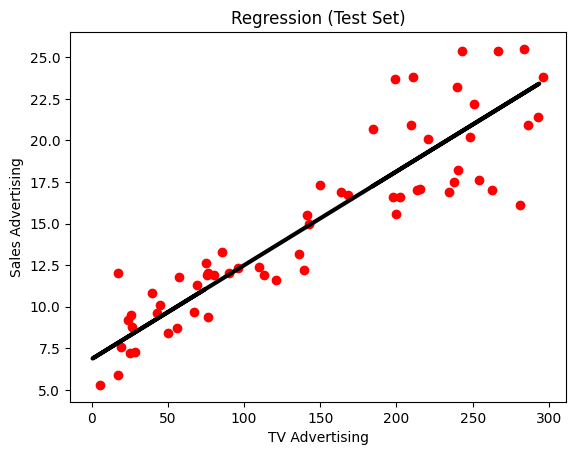

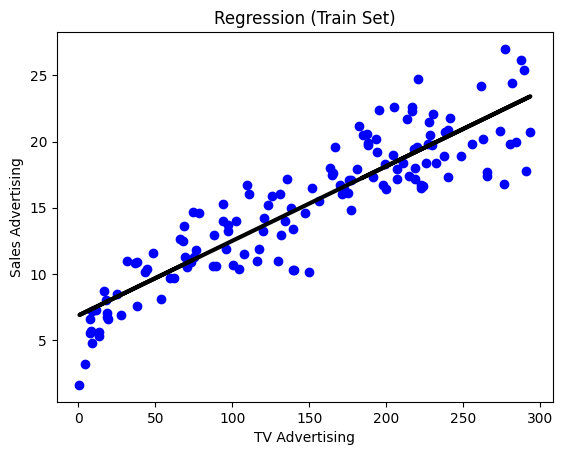

In [59]:
# Step 9: Residual Analysis

#check results of model fitting to know whether the model is satisfactory

plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,regressor.predict(x_train),color="black",linewidth=3)
plt.title("Regression (Test Set)")
plt.xlabel("TV Advertising")
plt.ylabel("Sales Advertising")
plt.show()

print("\n\n")

plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="black",linewidth=3)
plt.title("Regression (Train Set)")
plt.xlabel("TV Advertising")
plt.ylabel("Sales Advertising")
plt.show()

### Here, we plot firstly x_test, y_test datasets and regression line and secondly we plot x_train, y_train scatterplot graph with best-fit regression line

### Here we can clearly understand the regression line

In [92]:
# Step 10: Make predictions on the test set

y_pred=linear_model.predict(x_test)

print(y_pred)




[[10.62422701]
 [11.10941936]
 [ 8.19262349]
 [ 7.95566909]
 [11.37458262]
 [18.27446918]
 [23.37463063]
 [ 9.67076763]
 [ 9.27584362]
 [14.53397467]
 [ 7.82026657]
 [ 8.36187664]
 [22.68633451]
 [20.39577527]
 [18.74273622]
 [14.91197336]
 [18.12214135]
 [11.08685228]
 [21.16869797]
 [22.84994588]
 [11.16019531]
 [21.90777004]
 [11.95004332]
 [18.67503496]
 [20.07983607]
 [11.68488006]
 [20.57067019]
 [10.74270421]
 [14.82170502]
 [20.24344744]
 [ 8.46342852]
 [22.9853484 ]
 [ 8.29417538]
 [13.04454699]
 [17.2815174 ]
 [ 7.82026657]
 [11.15455354]
 [14.70322782]
 [21.0050866 ]
 [ 8.26032475]
 [20.38449173]
 [19.28998806]
 [ 9.37175374]
 [17.99802238]
 [10.02055746]
 [ 7.15453753]
 [18.07136541]
 [21.68209918]
 [19.00225771]
 [15.29561383]
 [10.09390049]
 [16.06289475]
 [23.57209263]
 [13.6764254 ]
 [ 9.07838162]
 [16.3506251 ]
 [13.21944191]
 [18.88942228]
 [20.86404231]
 [12.27726607]]


In [88]:
# Step 11: Print results

print("R2 score:%.2f" % r2_score(y_test,y_pred))

print("Mean Error:",mean_squared_error(y_test,y_pred))






R2 score:0.81
Mean Error: 5.405403017371825


# **ACCURACY PREDICTED = 81%**

In [101]:
#Step 12: Testing model

a=linear_model.coef_
b=linear_model.intercept_
c=float(input("Enter x_test value:"))  #returns corresponding y_pred value (sales)
print(a*c+b)

Enter x_test value:62.3
[[10.36470552]]


# **Conclusion**:-

### Here, Machine Learning Algorithm used is Linear Regression (LR) to predict sales using advertising dataset. The program did a really good job, getting it right about 81 times out of 100 which is 81%. This means it's pretty good.

### So, LR, is quite good at predicting sales for different types of methods.